# Exercise 04 - Due Friday, October 21 at 12pm

*Objectives*: Gain experience loading a CSV dataset into a database model you define yourself and using SQL to explore its contents. Explore the data by writing and executing a number of SQL queries using common syntax and functions and describing your findings.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries in the space provided, unless a text answer is requested. Results should be correct, according to the embedded tests. The notebook itself should be completely reproducible; from start to finish, another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Deadline*: Friday, October 21, 12pm. Submit your notebook to Blackboard and push it to your GitHub repository.

## Setup - obtain data and create database

The US City Open Data Census has data on [restaurant inspections from all over the country](http://us-city.census.okfn.org/dataset/food-safety).  Let's take a look at data from Albuquerque.  *Note*: metadata and other details for this dataset are available at http://data.cabq.gov/business/foodinspections/.

Fyi, to save you a step, I've converted this file into a clean CSV file by using the `dos2unix` command to change its line endings and to switch it to use commas instead of tabs using `csvformat -t inputfile.csv > outputfile.csv`.

First we download the dataset:

In [1]:
!wget https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv

--2016-10-24 15:15:55--  https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5025226 (4.8M) [text/plain]
Saving to: ‘abq-food-inspections-fy2010.csv’

abq-food-inspection 100%[=====================>]   4.79M  --.-KB/s   in 0.09s  

2016-10-24 15:15:55 (50.6 MB/s) - ‘abq-food-inspections-fy2010.csv’ saved [5025226/5025226]



## Problem 1 - examine the data (35 points)

Use `csvstat` and other tools as you see fit and observe its contents.  Review the metadata definitions linked to above.  Describe what you see:  What do all the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some complications or questions you would like to ask?

Insert a combination of code and text/markdown cells here to review the data and describe what you find.

In [2]:
!mv abq-food-inspections-fy2010.csv fy2010.csv

In [3]:
!wc -l fy2010.csv

17557 fy2010.csv


**By using 'wc -l', we could know that there are 17557 records in the file.**

In [4]:
!csvcut -n fy2010.csv

  1: FACILITY_NAME
  2: FACILITY_KEY
  3: SITE_ADDRESS
  4: CITY
  5: STATE
  6: ZIP
  7: OWNER_KEY
  8: OWNER_NAME
  9: NATURE_OF_BUSINESS
 10: STREET_NUMBER
 11: STREET_NAME
 12: STREET_TYPE
 13: POST_DIRECTIONAL
 14: PHONE
 15: PROGRAM_CATEGORY
 16: PROGRAM_CATEGORY_DESCRIPTION
 17: INSPECTION_DATE
 18: INSPECTION_TYPE
 19: INSPECTION_DESC
 20: SERIAL_NUM
 21: ACTION_CODE
 22: ACTION_DESC
 23: RESULT_CODE
 24: RESULT_DESC
 25: VIOLATION_CODE
 26: VIOLATION_DESC
 27: INSPECTION_MEMO


** What do all the columns mean? **

 1: FACILITY_NAME is the name of inspection facility

 2: FACILITY_KEY is the unique identification key of the inspection facility

 3: SITE_ADDRESS is the stress address of the inspection facility

 4: CITY is the city of the inspection facility

 5: STATE is the state of the inspection facility

 6: ZIP is the zip of the inspection facility

 7: OWNER_KEY is the unique identification key of the owner of inspection facility

 8: OWNER_NAME is the name of the owner of the inspection facility
 
 9: NATURE_OF_BUSINESS is the type of business

10: STREET_NUMBER is the stress number of the inspection facility

11: STREET_NAME is the stress name of the inspection facility

12: STREET_TYPE is the stress type of the inspection facility

13: POST_DIRECTIONAL is the postical direction of the inspection facility

14: PHONE is the phone of the inspection facility

15: PROGRAM_CATEGORY is the id that indicate the type of facility inspection

16: PROGRAM_CATEGORY_DESCRIPTION is the description of the id that indicate the type of facility inspection

17: INSPECTION_DATE is the date of inspection

18: INSPECTION_TYPE is code for type of inspection

19: INSPECTION_DESC is the description of inspection type

20: SERIAL_NUM is the unique id for the inspection activity

21: ACTION_CODE is the code of taken action

22: ACTION_DESC is the description of take action

23: RESULT_CODE is the code of inspection result

24: RESULT_DESC is the description of inspection result

25: VIOLATION_CODE is the code for the violation

26: VIOLATION_DESC is the escription of the violation

27: INSPECTION_MEMO is the note from the inspection

In [5]:
!shuf -n 10000 fy2010.csv | csvstat

  1. CANTEEN OF NM @ HOPE CHRISTIAN MS
	<class 'str'>
	Nulls: False
	Unique values: 2475
	5 most frequent values:
		SMITHS FOOD AND DRUG CENTERS INC:	82
		ISOTOPES PARK - OVATIONS:	57
		PER EHSII CECELIA GARCIA OOB LA REYNA DEL SUR:	50
		ECHO INC:	41
		ISLETA AMPHITHEATER:	41
	Max length: 77
  2. 76683
	<class 'int'>
	Nulls: False
	Min: 13
	Max: 94039
	Sum: 468431877
	Mean: 46847.87248724872
	Median: 51179
	Standard Deviation: 32564.954564802094
	Unique values: 2676
	5 most frequent values:
		46323:	57
		65863:	50
		80949:	41
		32817:	41
		54654:	38
  3. 8001 LOUISIANA BLVD NE 
	<class 'str'>
	Nulls: True
	Unique values: 2347
	5 most frequent values:
		1601 AVENIDA CESAR CHAVEZ SE:	57
		644 OLD COORS BLVD SW:	50
		5601 UNIVERSITY BLVD SE:	41
		300 MENAUL NW:	41
		88 LOUISIANA BLVD SE:	40
	Max length: 35
  4. ALBUQUERQUE
	<class 'str'>
	Nulls: False
	Values: ALBUQUERQUE
  5. NM
	<class 'str'>
	Nulls: False
	Values: 87, NM
  6. 87109
	<class 'str'>
	Nulls: False
	Unique values: 45
	5 mos

**Are there null values? **

There are 12 columns have null values:
1. Site Address
2. Nature Of_Business
3. Street Number
4. Street Name
5. Street Type
6. Post Directional
7. Phone
8. Program Category Description
9. Inspection Type
10. Violation Code
11. Violation Desc
12. Inspection Memo

**Which columns interest you the most? Which columns present some complications or questions you would like to ask?**

The columns that interest me most are facility name, nature of business, inspection date, inspection description, action description, result description, and violation description. 

Below are the questions I would like to ask.
1. Which restaurant owner had the most violations?
2. Do the facilities in nearby areas have the similar inspection results?
3. Does the inspection result vary by business type?
4. Which business types were constantly being inspected?
5. How many inspections are there in each quarter? Which quarter had the most one?

## Problem 2 - define a database model and load the data (35 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset into the database and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Insert a combination of code and text/markdown cells here to connect to your database, define your table, load its data, and verify the loaded records.

** Connect to database**

In [6]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [7]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


The following cells create the database 'exercise4'and make a connection to it.

In [8]:
!createdb -U dbuser exercise4

In [9]:
%sql postgresql://dbuser@localhost:5432/exercise4

'Connected: dbuser@exercise4'

** Create table **

In [10]:
%%sql
DROP TABLE IF EXISTS inspection;
CREATE TABLE inspection 
(
    FACILITY_NAME VARCHAR(80),
    FACILITY_KEY INTEGER,
    SITE_ADDRESS VARCHAR(40),
    CITY VARCHAR(12),
    STATE CHAR(2),
    ZIP CHAR(10),
    OWNER_KEY INTEGER,
    OWNER_NAME VARCHAR(85),
    NATURE_OF_BUSINESS VARCHAR(25),
    STREET_NUMBER  VARCHAR(7),
    STREET_NAME VARCHAR(24),
    STREET_TYPE VARCHAR(4),
    POST_DIRECTIONAL VARCHAR(3),
    PHONE CHAR(15),
    PROGRAM_CATEGORY VARCHAR(4),
    PROGRAM_CATEGORY_DESCRIPTION VARCHAR(40),
    INSPECTION_DATE TIMESTAMP,
    INSPECTION_TYPE VARCHAR(4),
    INSPECTION_DESC VARCHAR(32),
    SERIAL_NUM VARCHAR(9),
    ACTION_CODE VARCHAR(2),
    ACTION_DESC VARCHAR(40),
    RESULT_CODE VARCHAR(2),
    RESULT_DESC VARCHAR(40),
    VIOLATION_CODE VARCHAR(10),
    VIOLATION_DESC VARCHAR(50),
    INSPECTION_MEMO VARCHAR(50)
)

Done.
Done.


[]

**Load the data**

In [11]:
!pwd

/home/jovyan/work


In [12]:
%%sql
COPY inspection FROM '/home/jovyan/work/fy2010.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

17556 rows affected.


[]

**Verify the loaded records**

Below cell shows that the records number loaded to database is correct.

In [13]:
%%sql
SELECT COUNT(*) FROM inspection;

1 rows affected.


count
17556


Now, let's see the first 5 rows in the database.

In [14]:
%%sql
SELECT * FROM inspection
LIMIT 5;

5 rows affected.


facility_name,facility_key,site_address,city,state,zip,owner_key,owner_name,nature_of_business,street_number,street_name,street_type,post_directional,phone,program_category,program_category_description,inspection_date,inspection_type,inspection_desc,serial_num,action_code,action_desc,result_code,result_desc,violation_code,violation_desc,inspection_memo
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2009-10-21 00:00:00,None,EMERGENCY RESPONSE,DA8009125,00,NON-GRADED,00,NOT APPLICABLE,68,Delivered Informational Brochure,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2009-10-21 00:00:00,None,ROUTINE FOOD INSPECTION,DA8009123,11,APPROVED,03,IN COMPLIANCE,00,No Violations Found,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2009-10-21 00:00:00,None,ROUTINE FOOD INSPECTION,DA8009123,11,APPROVED,03,IN COMPLIANCE,55,Additional Comments,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2010-04-14 00:00:00,None,ROUTINE FOOD INSPECTION,DA8010205,11,APPROVED,03,IN COMPLIANCE,00,No Violations Found,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2010-04-14 00:00:00,None,ROUTINE FOOD INSPECTION,DA8010205,11,APPROVED,03,IN COMPLIANCE,55,Additional Comments,None


## Problem 3 - explore your data (30 points)

Now that the data is loaded, ask some questions of it!  Identify key variables of interest and note their ranges along with other useful descriptive statistics.  Choose and define a few lines of inquiry, execute queries for each, and describe what you find in your result sets.  Use any query techniques we've seen in class, including aggregate functions, transformations, subqueries, or others as appropriate. 

If you find interesting patterns, adding plots to your exploration would be useful.

Insert a combination of code and text/markdown cells here to explore your data.

### Aggregate Functions and Subqueries

### Question1: Which restaurant group (owner) has been inspected most?

First we need to check whether the number of owner key and owner name is the same.

In [15]:
%%sql
SELECT COUNT(*) AS owner_key_num 
FROM (SELECT DISTINCT owner_key FROM inspection)t1

1 rows affected.


owner_key_num
1892


In [16]:
%%sql
SELECT COUNT(*) AS owner_name_num 
FROM (SELECT DISTINCT owner_name FROM inspection)t2

1 rows affected.


owner_name_num
1852


The first cell shows that there are 1,892 distinct owner name, but 1,852 distinct owners. This indicates that the same owner can have multiple keys.

Therefore we use owner name to group by.

In [18]:
%%sql
SELECT owner_name, COUNT(inspection_date) AS inspection_num
FROM inspection
GROUP BY owner_name
ORDER BY COUNT(inspection_date) DESC
LIMIT 10;

10 rows affected.


owner_name,inspection_num
APS,792
SMITHS FOOD AND DRUG CENTERS INC,321
CIRCLE K STORES INC,277
ALBERTSONS,228
WAL MART STORES EAST LP,156
BLAKES LOTABURGER LLC,150
PALO ALTO INC,146
SCS BEVERAGE INC,138
WALGREENS CO,137
STARBUCKS CORP,123


** APS has been inspected most. It's 792 times in total. **

### Question2: What's the inspection result of the resaurant owner, which has been inspeted most?

First we select the resaurant owner, which has been inspeted most. Then we select the result from it.

In [19]:
%%sql
SELECT owner_name, result_desc, COUNT(*) as count
FROM inspection
WHERE owner_name IN(SELECT owner_name
                   FROM inspection
                   GROUP BY owner_name
                   ORDER BY COUNT(inspection_date) DESC
                   LIMIT 1)
GROUP BY owner_name, result_desc
ORDER BY owner_name

4 rows affected.


owner_name,result_desc,count
APS,IN COMPLIANCE,665
APS,NOT APPLICABLE,117
APS,OUT OF BUSINESS,3
APS,TRAINING RECEIVED,7


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Inspection Number of each quarter


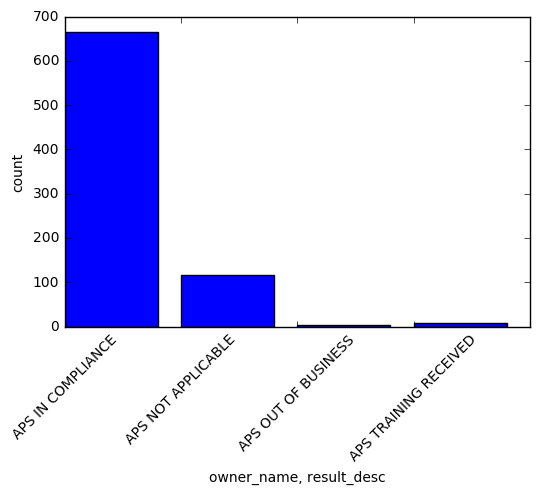

In [20]:
%matplotlib inline
result = _
result.bar()
!echo 'Inspection Number of each quarter'

**The inspection result of APS is: **

665 IN COMPLIANCE 

117 NOT APPLICABLE

3 OUT OF BUSINESS

7 TRAINING RECEIVED

### More about the inspection date

1.Create a table for inspecion date.

In [21]:
%%sql
DROP TABLE IF EXISTS inspection_days;
CREATE TABLE inspection_days (
    id SERIAL,
    inspection_date CHAR(10),
    inspection_year INTEGER,
    inspection_month INTEGER,
    inspection_day INTEGER,
    inspection_quarter INTEGER,
    day_of_week_str CHAR(9),
    day_of_week INTEGER,
    is_weekend BOOLEAN,
    is_weekday BOOLEAN
);

Done.
Done.


[]

2.Load the data into table inspection_days.

In [22]:
%%sql
INSERT INTO inspection_days (inspection_date, inspection_year, inspection_month, inspection_day, inspection_quarter, day_of_week_str, day_of_week,
                  is_weekend, is_weekday)
SELECT TO_CHAR(inspection_date, 'YYYY-MM-DD') AS inspection_date, 
    CAST(TO_CHAR(inspection_date, 'YYYY') AS INTEGER) AS inspection_year,
    CAST(TO_CHAR(inspection_date, 'MM') AS INTEGER) AS inspection_month,
    CAST(TO_CHAR(inspection_date, 'DD') AS INTEGER) AS inspection_date,
    CAST(TO_CHAR(inspection_date, 'Q') AS INTEGER) AS inspection_quarter,
    TO_CHAR(inspection_date, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(inspection_date, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(inspection_date, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(inspection_date, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday
FROM inspection;

17556 rows affected.


[]

### Qusetion3: How many inspections are there in each quarter? Which quarter had the most one? 

In [23]:
%%sql
SELECT * FROM inspection_days
LIMIT 10;

10 rows affected.


id,inspection_date,inspection_year,inspection_month,inspection_day,inspection_quarter,day_of_week_str,day_of_week,is_weekend,is_weekday
1,2009-10-21,2009,10,21,4,Wednesday,4,False,True
2,2009-10-21,2009,10,21,4,Wednesday,4,False,True
3,2009-10-21,2009,10,21,4,Wednesday,4,False,True
4,2010-04-14,2010,4,14,2,Wednesday,4,False,True
5,2010-04-14,2010,4,14,2,Wednesday,4,False,True
6,2010-03-23,2010,3,23,1,Tuesday,3,False,True
7,2010-03-23,2010,3,23,1,Tuesday,3,False,True
8,2010-03-23,2010,3,23,1,Tuesday,3,False,True
9,2009-12-15,2009,12,15,4,Tuesday,3,False,True
10,2009-12-15,2009,12,15,4,Tuesday,3,False,True


In [24]:
%%sql
SELECT inspection_date,
    inspection_year, 
    inspection_month, 
    inspection_day,
    inspection_quarter
FROM inspection_days
LIMIT 10
;

10 rows affected.


inspection_date,inspection_year,inspection_month,inspection_day,inspection_quarter
2009-10-21,2009,10,21,4
2009-10-21,2009,10,21,4
2009-10-21,2009,10,21,4
2010-04-14,2010,4,14,2
2010-04-14,2010,4,14,2
2010-03-23,2010,3,23,1
2010-03-23,2010,3,23,1
2010-03-23,2010,3,23,1
2009-12-15,2009,12,15,4
2009-12-15,2009,12,15,4


In [25]:
%%sql
SELECT inspection_quarter, COUNT(inspection_date) AS inspection_num
FROM inspection_days
GROUP BY inspection_quarter
ORDER BY COUNT(inspection_date) DESC

4 rows affected.


inspection_quarter,inspection_num
4,5468
3,5163
1,4341
2,2584


Inspection Number of each quarter


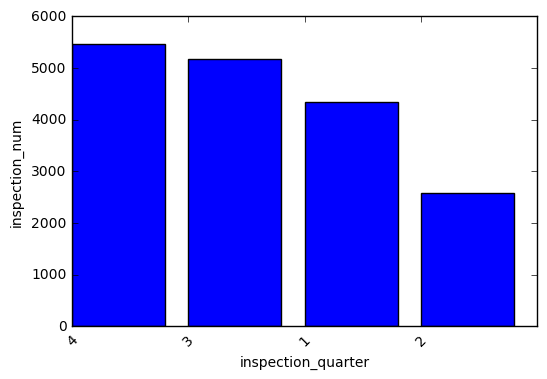

In [26]:
%matplotlib inline
result = _
result.bar()
!echo 'Inspection Number of each quarter'

** The inspection happened 5468 times in Quarter 4, 5163 in Q3, 4341 in Q1 and 2584 in Q2. **

** Quarter 4 has the most inspection. **

### Question4: Which quarter has the most ‘New Business Inspection’ ?

In [27]:
%%sql
SELECT quarter, COUNT(inspection_date) AS new_business_inspection_num
FROM (
    SELECT inspection_date, 
           TO_CHAR(INSPECTION_DATE, 'Q') AS quarter
    FROM inspection
    WHERE INSPECTION_DESC = 'New Business Inspection'
    ) AS date
GROUP BY quarter
ORDER BY COUNT(inspection_date) DESC;

4 rows affected.


quarter,new_business_inspection_num
2,303
4,242
3,232
1,228


New Business Inspection Number of each quarter


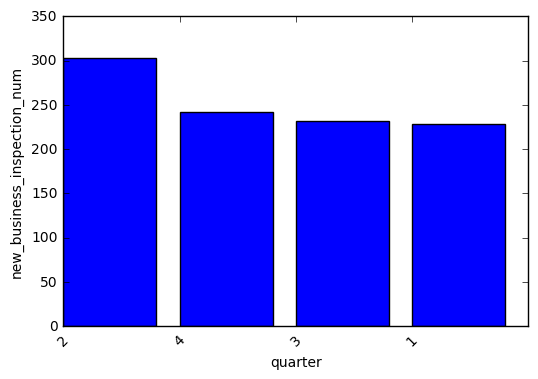

In [28]:
%matplotlib inline
result = _
result.bar()
!echo 'New Business Inspection Number of each quarter'

** Quarter2 has the most ‘New Business Inspection’. **

## Bonus (10 points)

We have seen a few simple techniques for normalizing data in class.  Choose a column or set of columns that might be redundant and normalize them out to another table:

* Identify the columns to normalize in the source data table
* Create one or more new tables to hold the normalized records
* Extract data into the new tables
* Re-insert the new foreign key references from the new table into the source table

In [29]:
%%sql
SELECT * FROM inspection
LIMIT 5;

5 rows affected.


facility_name,facility_key,site_address,city,state,zip,owner_key,owner_name,nature_of_business,street_number,street_name,street_type,post_directional,phone,program_category,program_category_description,inspection_date,inspection_type,inspection_desc,serial_num,action_code,action_desc,result_code,result_desc,violation_code,violation_desc,inspection_memo
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2009-10-21 00:00:00,None,EMERGENCY RESPONSE,DA8009125,00,NON-GRADED,00,NOT APPLICABLE,68,Delivered Informational Brochure,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2009-10-21 00:00:00,None,ROUTINE FOOD INSPECTION,DA8009123,11,APPROVED,03,IN COMPLIANCE,00,No Violations Found,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2009-10-21 00:00:00,None,ROUTINE FOOD INSPECTION,DA8009123,11,APPROVED,03,IN COMPLIANCE,55,Additional Comments,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2010-04-14 00:00:00,None,ROUTINE FOOD INSPECTION,DA8010205,11,APPROVED,03,IN COMPLIANCE,00,No Violations Found,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2010-04-14 00:00:00,None,ROUTINE FOOD INSPECTION,DA8010205,11,APPROVED,03,IN COMPLIANCE,55,Additional Comments,None


We need to find two comlumns which have one to one correspondence.

In [30]:
%%sql
SELECT COUNT(*), 'action_code' as Attributes_Compared
FROM (
    SELECT DISTINCT action_code
    FROM inspection
    )t1

UNION ALL

SELECT COUNT(*), 'action_desc' as Attributes_Compared
FROM (
    SELECT DISTINCT action_desc
    FROM inspection
    )t2
;

2 rows affected.


count,attributes_compared
8,action_code
8,action_desc


In [31]:
%%sql
DROP TABLE IF EXISTS actionkey;
CREATE TABLE actionkey
(
    ACTION_CODE VARCHAR(2) CONSTRAINT action_pk PRIMARY KEY,
    ACTION_DESC VARCHAR(40)
    
);

Done.
Done.


[]

In [32]:
%%sql
INSERT INTO actionkey (ACTION_CODE, ACTION_DESC)
SELECT DISTINCT action_code, action_desc
FROM inspection;

8 rows affected.


[]

In [39]:
%%sql
SELECT *
FROM actionkey;

8 rows affected.


action_code,action_desc
00,NON-GRADED
10,ANNUAL STICKER NOT ISSUED
17,FOOD PERMIT SUSPENSION
09,ANNUAL STICKER ISSUED
12,NO PERMIT APPLICATION ISSUED
11,APPROVED
06,UNSATISFACTORY
03,FACILITY CLOSED AT TIME OF SERVICE


In [34]:
%%sql
SELECT COUNT(*), 'result_code' as Attributes_Compared
FROM (
    SELECT DISTINCT result_code
    FROM inspection
    )t1

UNION ALL

SELECT COUNT(*), 'result_desc' as Attributes_Compared
FROM (
    SELECT DISTINCT result_desc
    FROM inspection
    )t2
;

2 rows affected.


count,attributes_compared
19,result_code
19,result_desc


In [36]:
%%sql
DROP TABLE IF EXISTS resultkey;
CREATE TABLE resultkey
(
    RESULT_CODE VARCHAR(2) CONSTRAINT result_pk PRIMARY KEY,
    RESULT_DESC VARCHAR(40)
    
);

Done.
Done.


[]

In [38]:
%%sql
INSERT INTO resultkey (RESULT_CODE, RESULT_DESC)
SELECT DISTINCT result_code, result_desc
FROM inspection;

19 rows affected.


[]

In [40]:
%%sql
SELECT *
FROM resultkey;

19 rows affected.


result_code,result_desc
18,TRAINING RECEIVED
12,PERMIT REINSTATEMENT
11,FACILITY CLOSED AT TIME OF INSPECTION
20,EMBARGO
03,IN COMPLIANCE
22,OUT OF BUSINESS
13,PHONE CALL
14,IMMEDIATE CLOSURE
04,NOTICE
25,PLAN REVIEW -APPROVED


In [44]:
%%sql
ALTER TABLE inspection
DROP COLUMN action_desc;

Done.


[]

In [45]:
%%sql
ALTER TABLE inspection
DROP COLUMN result_desc;

Done.


[]

In [46]:
%%sql
ALTER TABLE inspection
ADD CONSTRAINT action_fk FOREIGN KEY (action_code)
REFERENCES actionkey (action_code) ON DELETE NO ACTION;

Done.


[]

In [47]:
%%sql
ALTER TABLE inspection
ADD CONSTRAINT result_fk FOREIGN KEY (result_code)
REFERENCES resultkey (result_code) ON DELETE NO ACTION;

Done.


[]

In [48]:
%%sql
SELECT COLUMN_NAME,CONSTRAINT_NAME
from information_schema.KEY_COLUMN_USAGE
where TABLE_NAME = 'inspection' AND COLUMN_NAME = 'action_code'
;

1 rows affected.


column_name,constraint_name
action_code,action_fk


In [49]:
%%sql
SELECT COLUMN_NAME,CONSTRAINT_NAME
from information_schema.KEY_COLUMN_USAGE
where TABLE_NAME = 'inspection' AND COLUMN_NAME = 'result_code'
;

1 rows affected.


column_name,constraint_name
result_code,result_fk
